In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot 
import datetime as dt
import seaborn as sns

# IMPORTING THE DATASET

In [54]:
covid = pd.read_csv('covid_19_india.csv', parse_dates = ['Date'], dayfirst = True)

In [76]:
covid = covid.rename(columns = {"State/UnionTerritory" : "state"})
covid = covid.rename(columns = {"Confirmed" : "confirmed_in_lakh"})

In [77]:
covid.head()

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# GETTING INFO OF THE DATASET

In [78]:
covid.shape

(7786, 9)

In [79]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       7786 non-null   int64         
 1   Date                      7786 non-null   datetime64[ns]
 2   Time                      7786 non-null   object        
 3   state                     7786 non-null   object        
 4   ConfirmedIndianNational   7786 non-null   object        
 5   ConfirmedForeignNational  7786 non-null   object        
 6   Cured                     7786 non-null   int64         
 7   Deaths                    7786 non-null   int64         
 8   confirmed_in_lakh         7786 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 547.6+ KB


In [80]:
covid.describe()

,Sno,Cured,Deaths,confirmed_in_lakh
count,7786.000000,7.786000e+03,7786.000000,7.786000e+03
mean,3893.500000,4.796753e+04,1051.592088,6.036893e+04
std,2247.768931,1.325086e+05,3638.415694,1.599680e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,1947.250000,5.500000e+01,1.000000,2.520000e+02
50%,3893.500000,2.234500e+03,34.000000,3.676000e+03
75%,5839.750000,2.641950e+04,548.750000,3.814050e+04
max,7786.000000,1.470660e+06,43348.000000,1.648665e+06


In [81]:
covid.columns

Index(['Sno', 'Date', 'Time', 'state', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'confirmed_in_lakh'],
      dtype='object')

# TOAL NUMBER OF DEATHS

In [117]:
covid.Deaths.sum()

8187696

# TOTAL NUMBER OF CONFIRMED CASES

In [118]:
covid.confirmed_in_lakh.sum()

470032521

# TOTAL NUMBER OF CURED CASES

In [119]:
covid.Cured.sum()

373475207

# CHECKING NULL VALUES

In [82]:
#NO NULL VALUES PRESENT
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
state                       0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
confirmed_in_lakh           0
dtype: int64

# LOOKING AT THE LATEST DATES

In [83]:
covid.tail()

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7781,7782,2020-10-27,8:00 AM,Telengana,-,-,213466,1315,232671
7782,7783,2020-10-27,8:00 AM,Tripura,-,-,28153,344,30293
7783,7784,2020-10-27,8:00 AM,Uttarakhand,-,-,55663,1001,60744
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077
7785,7786,2020-10-27,8:00 AM,West Bengal,-,-,310086,6546,353822


In [84]:
#latest date
today = covid[covid.Date == '2020-10-27']
today

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7751,7752,2020-10-27,8:00 AM,Andaman and Nicobar Islands,-,-,3997,58,4253
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7753,7754,2020-10-27,8:00 AM,Arunachal Pradesh,-,-,12182,35,14391
7754,7755,2020-10-27,8:00 AM,Assam,-,-,188587,908,204386
7755,7756,2020-10-27,8:00 AM,Bihar,-,-,201942,1058,212355
7756,7757,2020-10-27,8:00 AM,Chandigarh,-,-,13230,222,14085
7757,7758,2020-10-27,8:00 AM,Chhattisgarh,-,-,153654,1861,177608
7758,7759,2020-10-27,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,-,-,3176,2,3228
7759,7760,2020-10-27,8:00 AM,Delhi,-,-,327390,6312,359488
7760,7761,2020-10-27,8:00 AM,Goa,-,-,39433,582,42532


# SORTING THE DATA W.R.T NUMBER OF CONFIRMED CASES

In [88]:
max_confirmed_cases = today.sort_values(by = 'confirmed_in_lakh', ascending = False)
max_confirmed_cases

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077
7767,7768,2020-10-27,8:00 AM,Kerala,-,-,302017,1352,397217
7759,7760,2020-10-27,8:00 AM,Delhi,-,-,327390,6312,359488
7785,7786,2020-10-27,8:00 AM,West Bengal,-,-,310086,6546,353822
7775,7776,2020-10-27,8:00 AM,Odisha,-,-,266105,1259,282695
7781,7782,2020-10-27,8:00 AM,Telengana,-,-,213466,1315,232671


### GETTING THE STATES WITH MAXIMUM NUMBER OF CONFIRMED CASES

In [89]:
top_states_confirmed = max_confirmed_cases.head()
top_states_confirmed

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077


# MAKING THE BAR PLOT FOR THE STATES WITH TOP CONFIRMED CASES

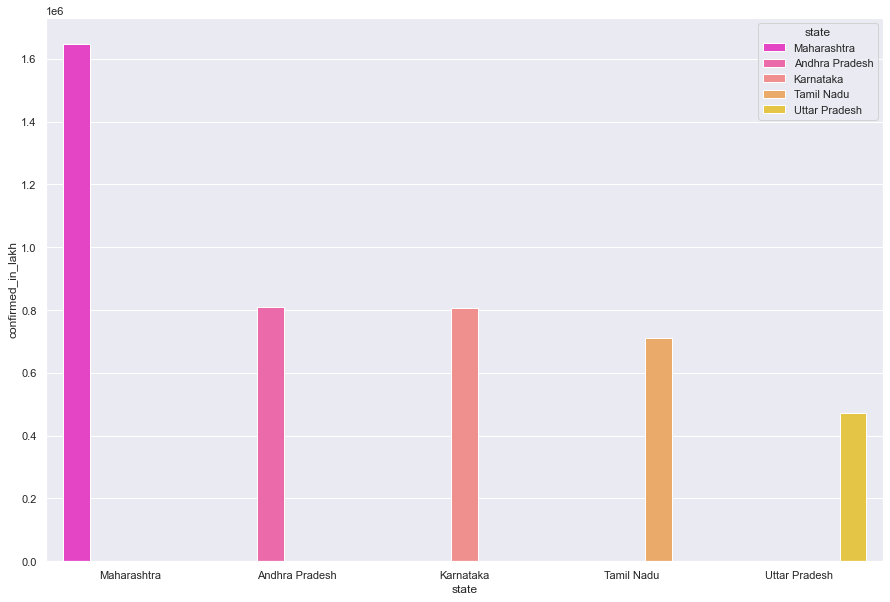

In [90]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="confirmed_in_lakh",data=top_states_confirmed,hue="state", palette = 'spring')
plt.show()

# SORTING W.R.T NUMBER OF CURED CASES

In [94]:
max_cured_cases = today.sort_values(by = 'Cured', ascending = False)
max_cured_cases

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077
7759,7760,2020-10-27,8:00 AM,Delhi,-,-,327390,6312,359488
7785,7786,2020-10-27,8:00 AM,West Bengal,-,-,310086,6546,353822
7767,7768,2020-10-27,8:00 AM,Kerala,-,-,302017,1352,397217
7775,7776,2020-10-27,8:00 AM,Odisha,-,-,266105,1259,282695
7781,7782,2020-10-27,8:00 AM,Telengana,-,-,213466,1315,232671


In [96]:
top_states_cured = max_cured_cases.head()
top_states_cured

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077


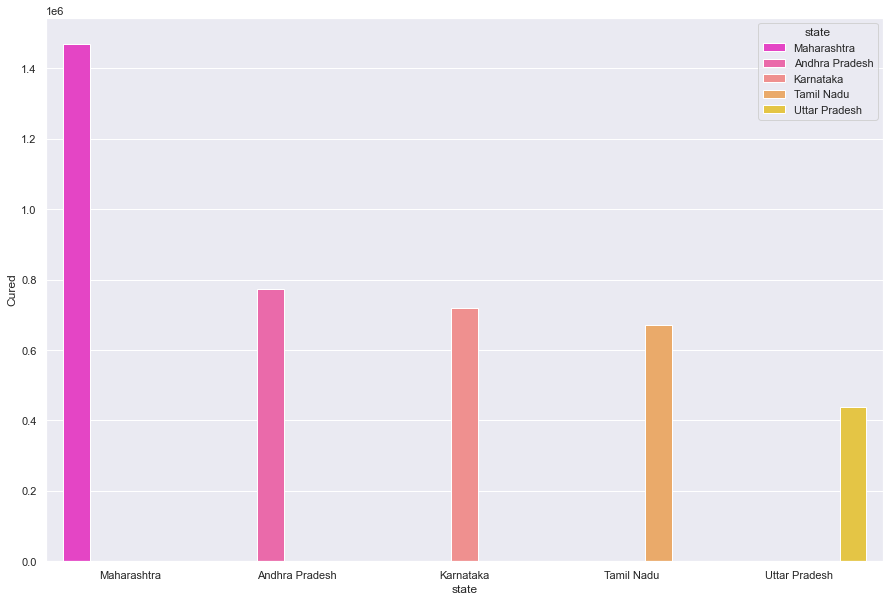

In [98]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="Cured",data=top_states_cured,hue="state", palette = 'spring')
plt.show()

# SORTING W.R.T NUMBER OF DEATHS

In [101]:
deaths = today.sort_values(by = 'Deaths', ascending = False)
deaths

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924
7785,7786,2020-10-27,8:00 AM,West Bengal,-,-,310086,6546,353822
7759,7760,2020-10-27,8:00 AM,Delhi,-,-,327390,6312,359488
7777,7778,2020-10-27,8:00 AM,Punjab,-,-,123047,4125,131391
7761,7762,2020-10-27,8:00 AM,Gujarat,-,-,150513,3690,167919
7769,7770,2020-10-27,8:00 AM,Madhya Pradesh,-,-,154222,2890,167969


In [103]:
top_death_cases = deaths.head()
top_death_cases

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
7770,7771,2020-10-27,8:00 AM,Maharashtra,-,-,1470660,43348,1648665
7780,7781,2020-10-27,8:00 AM,Tamil Nadu,-,-,671489,10956,711713
7766,7767,2020-10-27,8:00 AM,Karnataka,-,-,719558,10947,805947
7784,7785,2020-10-27,8:00 AM,Uttar Pradesh,-,-,438521,6904,472077
7752,7753,2020-10-27,8:00 AM,Andhra Pradesh,-,-,773548,6606,808924


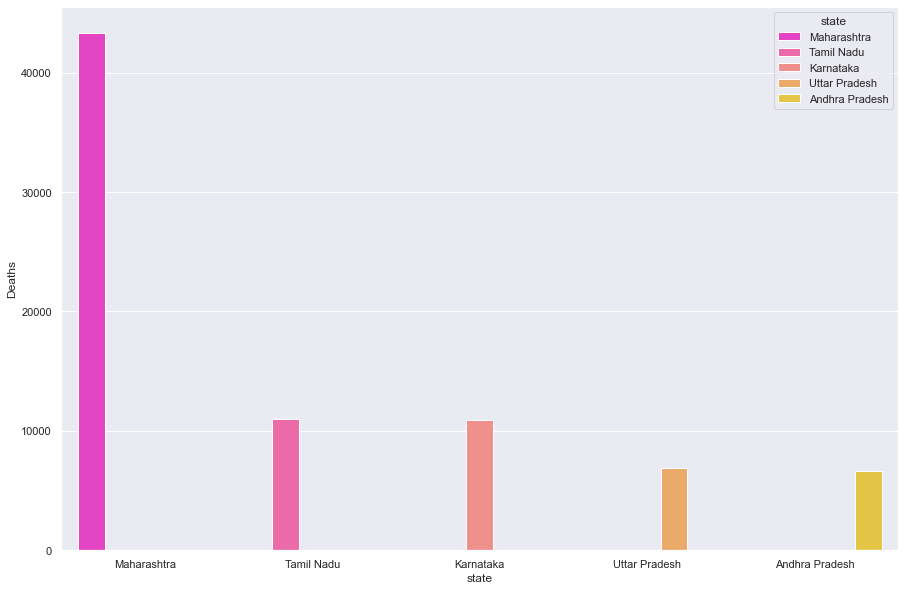

In [107]:
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="state",y="Deaths",data=top_death_cases,hue="state", palette = 'spring')
plt.show()

# ANALYZING [MAHARASHTRA STATE]

In [120]:
maha = covid[covid.state == 'Maharashtra']
maha

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
7630,7631,2020-10-23,8:00 AM,Maharashtra,-,-,1431856,42831,1625197
7665,7666,2020-10-24,8:00 AM,Maharashtra,-,-,1445103,43015,1632544
7700,7701,2020-10-25,8:00 AM,Maharashtra,-,-,1455107,43152,1638961
7735,7736,2020-10-26,8:00 AM,Maharashtra,-,-,1460755,43264,1645020


### VISUALIZING CONFIRMED CASES IN MAHARASHTRA

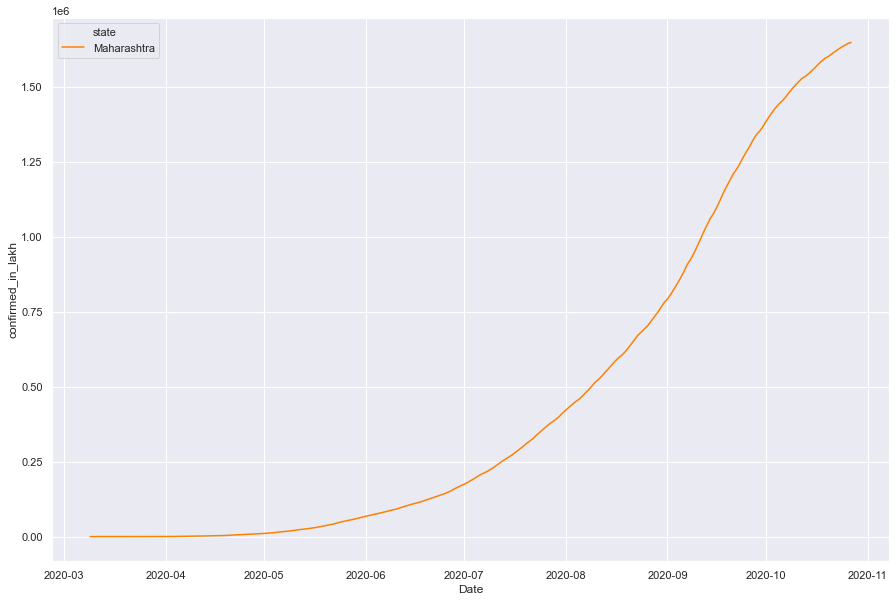

In [128]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="confirmed_in_lakh",data=maha,hue="state", palette = 'autumn')
plt.show()

## DEATH CASES IN MAHARASHTRA

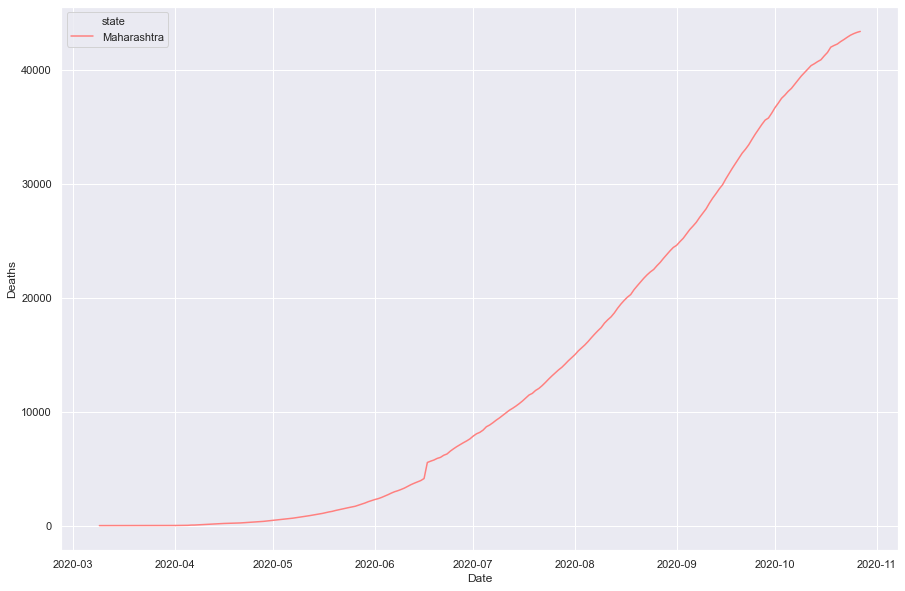

In [130]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Deaths",data=maha,hue="state", palette = 'spring')
plt.show()

# ANALYZING [KERALA]

In [135]:
ker = covid[covid.state == 'Kerala']
ker

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
7627,7628,2020-10-23,8:00 AM,Kerala,-,-,274675,1255,369323
7662,7663,2020-10-24,8:00 AM,Kerala,-,-,280793,1281,377834
7697,7698,2020-10-25,8:00 AM,Kerala,-,-,287261,1306,386087
7732,7733,2020-10-26,8:00 AM,Kerala,-,-,294910,1332,392930


# VISUALIZING CONFIRMED CASES IN KARELA

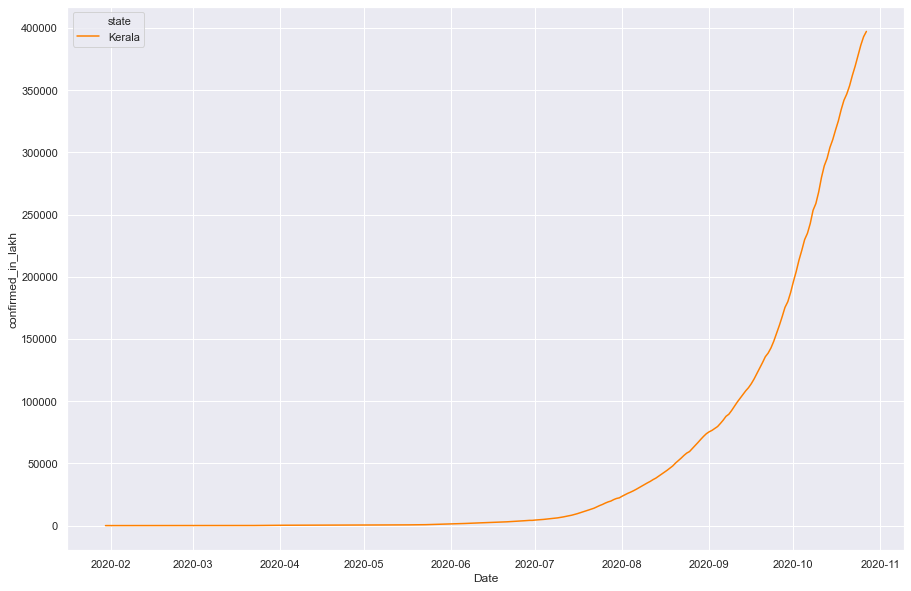

In [136]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="confirmed_in_lakh",data=ker,hue="state", palette = 'autumn')
plt.show()

# DEATH CASES IN KERALA

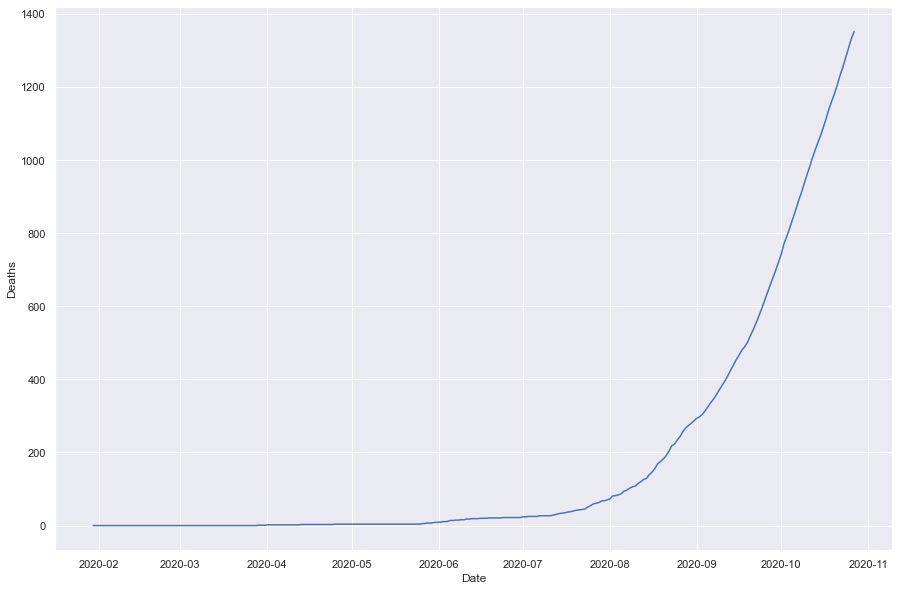

In [138]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Deaths",data=ker, palette = 'spring')
plt.show()

# ANALYZING [JAMMU AND KASHMIR]

In [139]:
jk = covid[covid.state == 'Jammu and Kashmir']
jk

,Sno,Date,Time,state,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,confirmed_in_lakh
81,82,2020-03-09,6:00 PM,Jammu and Kashmir,1,0,0,0,1
96,97,2020-03-10,6:00 PM,Jammu and Kashmir,1,0,0,0,1
106,107,2020-03-11,6:00 PM,Jammu and Kashmir,1,0,0,0,1
117,118,2020-03-12,6:00 PM,Jammu and Kashmir,1,0,0,0,1
130,131,2020-03-13,6:00 PM,Jammu and Kashmir,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
7624,7625,2020-10-23,8:00 AM,Jammu and Kashmir,-,-,80802,1412,90166
7659,7660,2020-10-24,8:00 AM,Jammu and Kashmir,-,-,81486,1424,90752
7694,7695,2020-10-25,8:00 AM,Jammu and Kashmir,-,-,82219,1430,91329
7729,7730,2020-10-26,8:00 AM,Jammu and Kashmir,-,-,82858,1438,91861


### VISUALIZING CONFIRMED CASES IN JAMMU AND KASHMIR

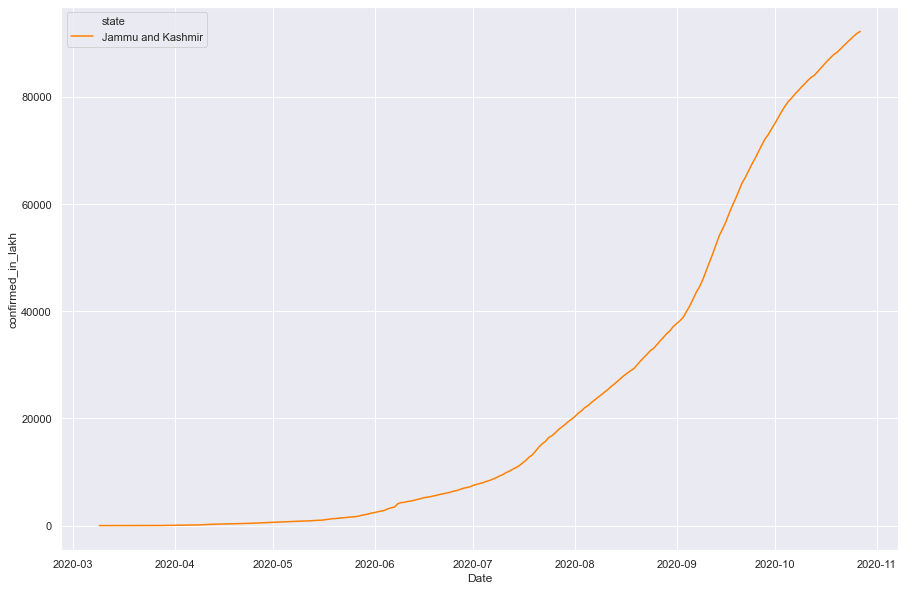

In [141]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="confirmed_in_lakh",data=jk,hue="state", palette = 'autumn')
plt.show()

# DEATH CASES IN JAMMU AND KASHMIR

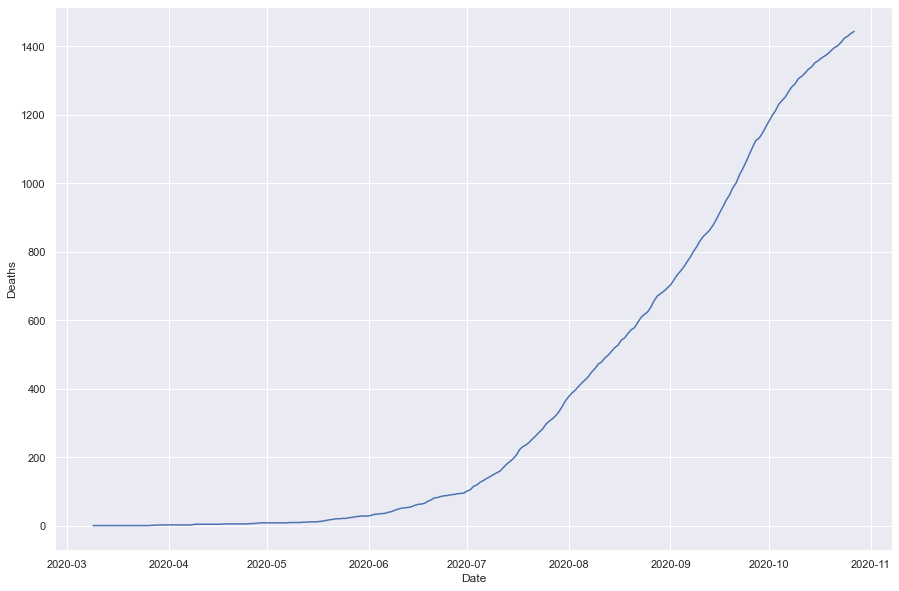

In [142]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Date",y="Deaths",data=jk, palette = 'spring')
plt.show()

# CHECKING STATE WISE TESTING DETAILS

In [144]:
tests = pd.read_csv('statewisetest.csv')
tests

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
6651,2020-10-22,West Bengal,4166495.0,NaN,NaN
6652,2020-10-23,West Bengal,4211077.0,NaN,NaN
6653,2020-10-24,West Bengal,4255801.0,NaN,NaN
6654,2020-10-25,West Bengal,4298339.0,NaN,NaN


In [149]:
test_latest = tests[tests.Date == '2020-10-26'  ]
test_latest

,Date,State,TotalSamples,Negative,Positive
165,2020-10-26,Andaman and Nicobar Islands,83115.0,NaN,4253.0
365,2020-10-26,Andhra Pradesh,7621896.0,NaN,NaN
555,2020-10-26,Arunachal Pradesh,308912.0,283634,NaN
736,2020-10-26,Assam,4525529.0,NaN,NaN
937,2020-10-26,Bihar,10223823.0,NaN,NaN
1138,2020-10-26,Chandigarh,101778.0,87074,NaN
1332,2020-10-26,Chhattisgarh,1698096.0,NaN,NaN
1703,2020-10-26,Delhi,4398819.0,NaN,NaN
1898,2020-10-26,Goa,291630.0,NaN,NaN
2100,2020-10-26,Gujarat,5793788.0,NaN,NaN


# VISUALIZING CURED CASES

In [151]:
max_test_state = test_latest.sort_values(by = 'TotalSamples', ascending = False)
max_test_state

,Date,State,TotalSamples,Negative,Positive
6246,2020-10-26,Uttar Pradesh,14138340.0,NaN,NaN
937,2020-10-26,Bihar,10223823.0,NaN,NaN
5723,2020-10-26,Tamil Nadu,9589743.0,NaN,NaN
3849,2020-10-26,Maharashtra,8645195.0,NaN,NaN
365,2020-10-26,Andhra Pradesh,7621896.0,NaN,NaN
3106,2020-10-26,Karnataka,7447493.0,NaN,NaN
2100,2020-10-26,Gujarat,5793788.0,NaN,NaN
736,2020-10-26,Assam,4525529.0,NaN,NaN
1703,2020-10-26,Delhi,4398819.0,NaN,NaN
3315,2020-10-26,Kerala,4363557.0,NaN,397219.0


# TOTAL TEST IN INDIA STATE WISE

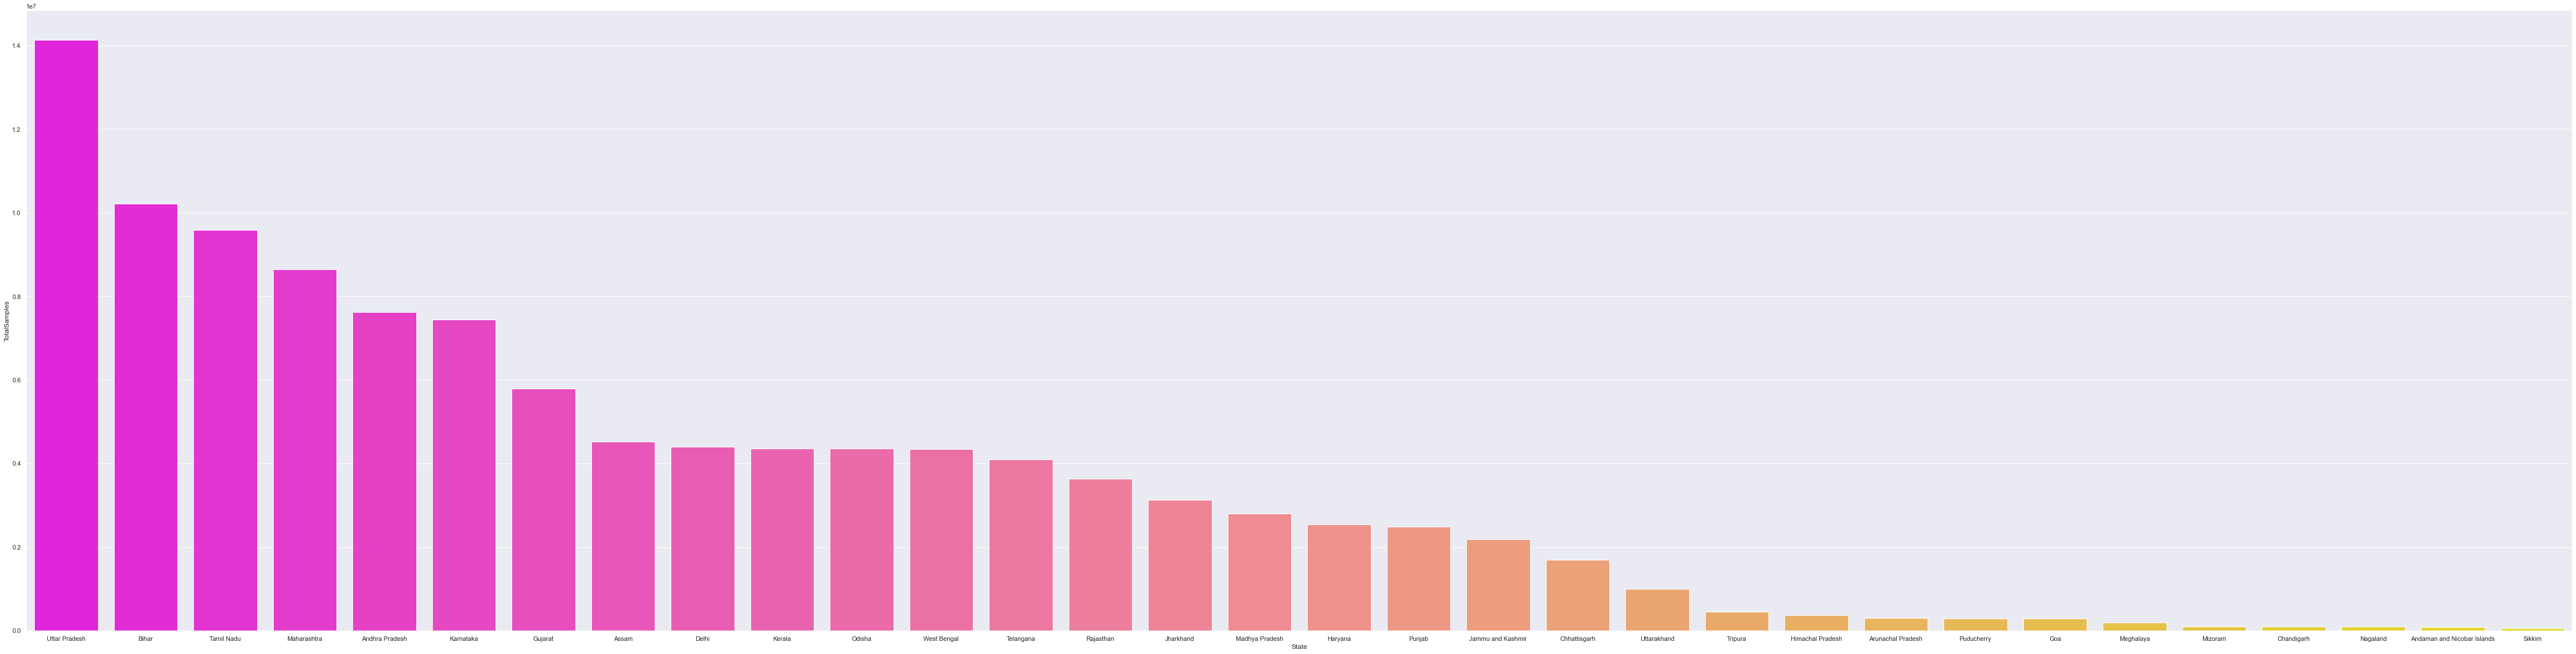

In [155]:
sns.set(rc={'figure.figsize':(80,20)})
sns.barplot(x="State",y="TotalSamples",data=max_test_state , palette = 'spring')
plt.show()

# TOP 5 STATES WITH MAX TEST CASES

In [157]:
top_max_test_state = max_test_state.head()
max_test_state

,Date,State,TotalSamples,Negative,Positive
6246,2020-10-26,Uttar Pradesh,14138340.0,NaN,NaN
937,2020-10-26,Bihar,10223823.0,NaN,NaN
5723,2020-10-26,Tamil Nadu,9589743.0,NaN,NaN
3849,2020-10-26,Maharashtra,8645195.0,NaN,NaN
365,2020-10-26,Andhra Pradesh,7621896.0,NaN,NaN
3106,2020-10-26,Karnataka,7447493.0,NaN,NaN
2100,2020-10-26,Gujarat,5793788.0,NaN,NaN
736,2020-10-26,Assam,4525529.0,NaN,NaN
1703,2020-10-26,Delhi,4398819.0,NaN,NaN
3315,2020-10-26,Kerala,4363557.0,NaN,397219.0


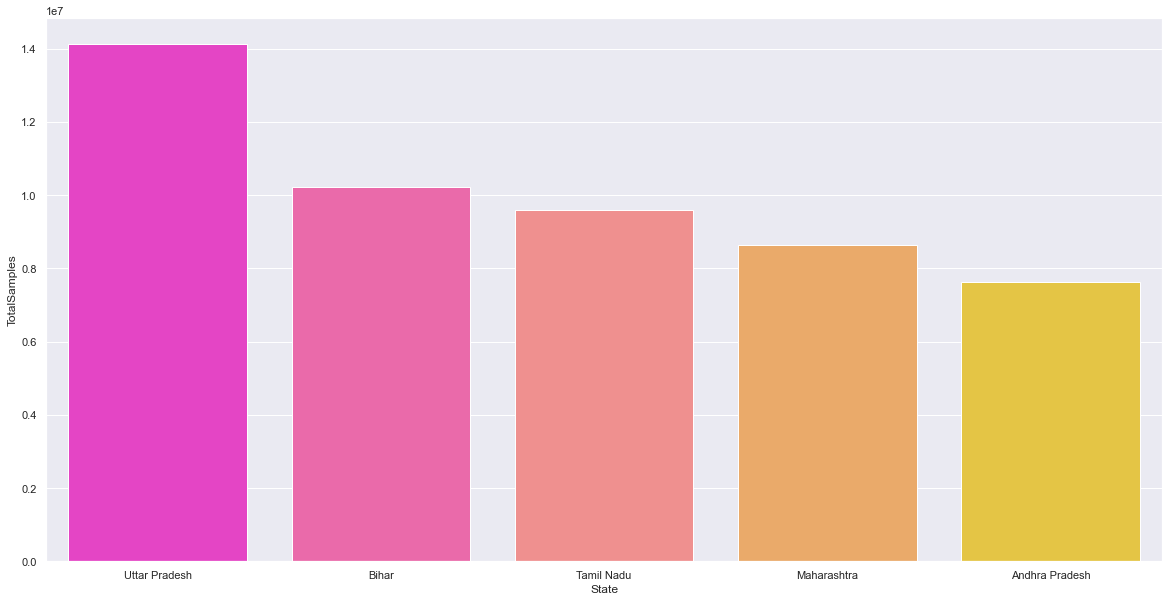

In [163]:
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="State",y="TotalSamples",data= top_max_test_state , palette = 'spring')
plt.show()

# END :)